<a href="https://colab.research.google.com/github/eunicebalicanta/econ326-research/blob/main/ECON326_FinalResearchPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Examining the Impact of Screen Time, Physical Health, and Social Wellbeing on Youth Sleep Quality

####ECON 326 Final Research Paper
####Solo Advanced Track by Eunice Balicanta


---

**Abstract**: Addressing a growing epidemic which affects almost three-quarters of high school students, this inferential analysis investigates the impact of digital dependency, physical conditioning, and social connectedness on sleep deprivation. Transforming a dataset from non-profit Child Mind Institute, the original study comprises of roughly 5,000 youth aged 5 to 20, measuring physical acitivity, body composition, device engagement, and close-relationship accounts. With the performance of multiple linear regression, results indicate that social withdrawal, as described through parent questionnaires, and body mass index, recorded through bio-electrical impedance analysis, have statistically significant relationships with sleep quality, while internet usage showed minimal positive correlation. Nonetheless, the low R-squared value computed in the Ordinary Least Squares regression emphasize the need for further research exploring missing variables or potential non-linear relationships.







##1. Preparing Our Data

Programmed in Python, this inferential analysis will utilize the following packages:

- **Pandas**: A broadly-used library for statistics using 2-dimensional tables
- **NumPy**: Offers numerical computing tools such as mathematical functions and random number generators
- **Matplotlib** & **Seaborn**: Data visualization tools
- **Statsmodels**: Provides estimation, conduction, and exploration of various statistical models


In [2]:
# Install the packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

# Read the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as diag
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

##2. Viewing & Cleaning the Data

Firstly, the data dictionary, which describes each fields's instrument (Demographics, Bio-electric Impedence Analysis, etc.), data type (string, float, catgeorical integer, etc.), and dummy values. This stage is particularly important for this research, as it utilizes both quantitative and qualitative variables.

In [6]:
# Load the data dictionary
file_dictionary = '/content/drive/MyDrive/ECON 326 Project Code/Final Paper/child-mind-institute-problematic-internet-use (2)/data_dictionary.csv'
data_dicionary = pd.read_csv(file_dictionary)
data_dicionary

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [7]:
# Load the data
file_data = '/content/drive/MyDrive/ECON 326 Project Code/Final Paper/child-mind-institute-problematic-internet-use (2)/train.csv'
data = pd.read_csv(file_data)
data.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With the dataset's vaguely titled columns, this step involves changing these to more intuitive, clearly-defined names.

*PCIAT-PCIAT__08* is a variable from the *Parent-Child Internet Addiction Test* instrument measured from the survey question "How often does your child seem withdrawn from others since discovering the Internet?" Parent answers are captured by the following dummy values:
- 0 = Does Not Apply
- 1 = Rarely
- 2 = Occasionally
- 3 = Frequently
- 4 = Often
- 5 = Always

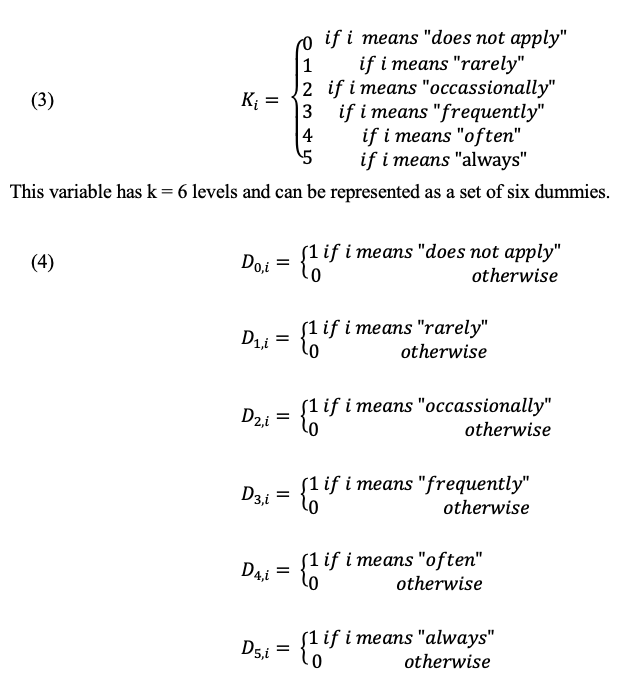

This study is mostly focused on participants in their teens and formal stages of neuro-physical development, *Age *is filtered between 13 to 19 years old. According to a Stanford Study, most youth get their first cellphone by 11.6 years old. Rows with missing "NA" values will also be dropped for more consistent, and reliable analysis.


In [8]:
# Rename columns for better interpretibility
data.rename(columns={
    data.columns[data.columns.get_loc('Basic_Demos-Age')]: 'Age',
    data.columns[data.columns.get_loc('SDS-SDS_Total_T')]: 'Sleep_Disturbance_Scale',
    data.columns[data.columns.get_loc('PreInt_EduHx-computerinternet_hoursday')]: 'Internet_Usage',
    data.columns[data.columns.get_loc('PCIAT-PCIAT_08')]: 'Social_Withdrawal',
    data.columns[data.columns.get_loc('BIA-BIA_BMI')]: 'BMI',
      }, inplace=True)

# Filter out unecessary variables and drop missing "NA" values
data = data[(data['Age'] >= 13) & (data['Age'] <= 19)]
data = data[['Age','Sleep_Disturbance_Scale', 'Internet_Usage', 'Social_Withdrawal', 'BMI']].dropna()
data

,Age,Sleep_Disturbance_Scale,Internet_Usage,Social_Withdrawal,BMI
5,13,56.0,0.0,2.0,30.1865
12,13,47.0,1.0,1.0,21.0814
20,14,43.0,2.0,1.0,17.1705
24,15,49.0,1.0,1.0,21.1801
45,16,50.0,0.0,0.0,21.3996
...,...,...,...,...,...
3935,15,56.0,3.0,3.0,29.4078
3946,14,71.0,3.0,4.0,19.3158
3952,15,90.0,3.0,2.0,26.3676
3955,13,50.0,1.0,2.0,16.3642


After ensuring that all records have the correct *Age* values (between 5 to 12 years old), we'll drop this column and only keep the relevant independent and dependent variables.


In [9]:
data = data.drop(columns=['Age'])

After cleaning the data, the next step is focused on observing key aggregate numbers which will be helpful for the remainder of our regression analyses. The *.describe()* function helps simplify this process by immediately providing the count, mean standard deviation, minimum, maximum, median, and lower and uppder quartile.

In [10]:
# Create a table of summary statistics for each variable
summary_stats = data.describe()
summary_stats

,Sleep_Disturbance_Scale,Internet_Usage,Social_Withdrawal,BMI
count,335.000000,335.000000,335.000000,335.000000
mean,57.677612,1.638806,1.901493,22.469895
std,12.583991,1.004921,1.390461,5.625360
min,38.000000,0.000000,0.000000,12.237200
25%,49.000000,1.000000,1.000000,18.599600
50%,55.000000,2.000000,2.000000,20.951100
75%,66.000000,2.000000,3.000000,24.708700
max,100.000000,3.000000,5.000000,46.107900


Now that the dataset is ready and cleaned, it's time to begin the data transformation. Some questions to consider when building an inferential model include "What relationships are we interested in investigating?"

The code below quantifies the correlations between the independent variables from a scale between -1 (high negative correlation) to 1 (high positive correlation).

In [25]:
# Quantify correlations between variables(-1 to 1)
corr_matrix = data.corr()
corr_matrix

,Sleep_Disturbance_Scale,Internet_Usage,Social_Withdrawal,BMI
Sleep_Disturbance_Scale,1.000000,0.123585,0.216859,0.152215
Internet_Usage,0.123585,1.000000,0.090166,0.102601
Social_Withdrawal,0.216859,0.090166,1.000000,0.043827
BMI,0.152215,0.102601,0.043827,1.000000


Since this research mostly concerned about how our indepedent variables, *BMI, Social_Withdrawal,* and *Internet_Usage* interact with our dependent variable, *Sleep_Disturbance_Scale*, the first column depicts lower positive correlation. However, visualizing these individual linear regressions can help further describe the relationships between these variables.

This can be achieved by performing an *Eye-ball Test*, which simply involves observing the diagrams and plots to ideintify trends, and patterns, including the slope of the best-fit line. As shown in this analysis, despite the dummy variables which make the individual data points in the scatterplots difficult to discern, there are weak to moderate positive correlations.

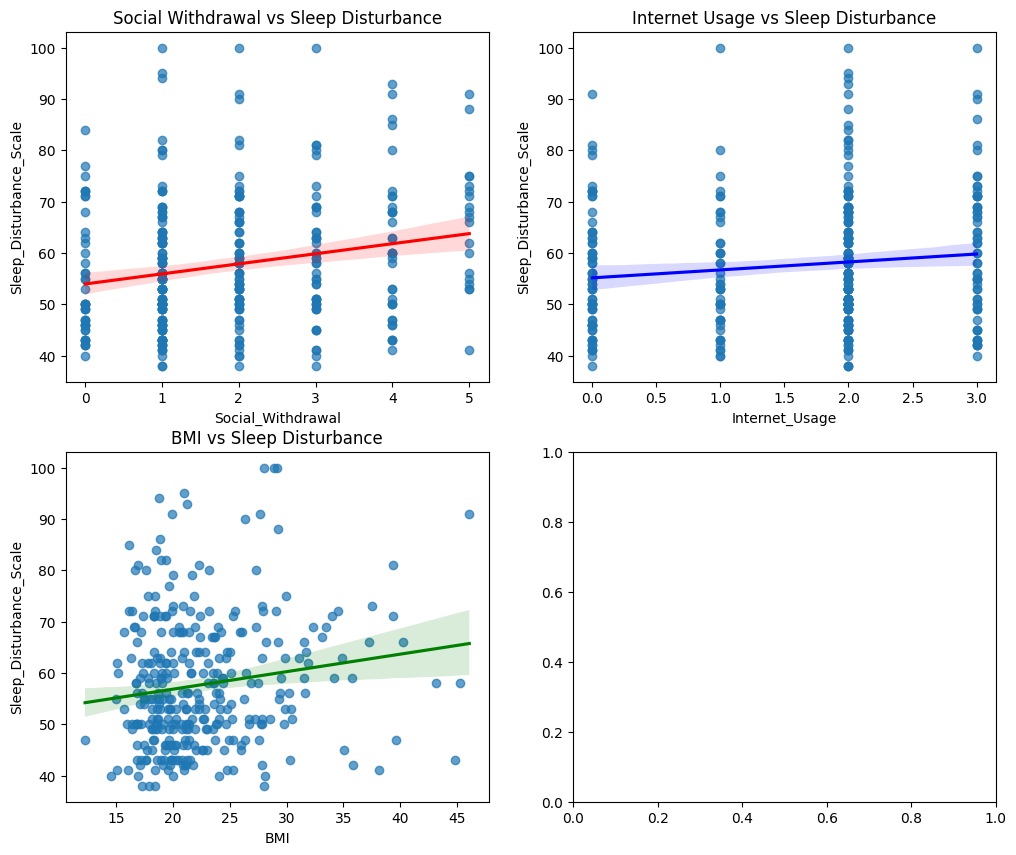

In [12]:
# Create Scatterplots with Best-fit Line for the X variable against the Y variable
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(
    x='Social_Withdrawal',
    y='Sleep_Disturbance_Scale',
    data=data,
    ax=axes[0, 0],
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
      )
axes[0, 0].set_title("Social Withdrawal vs Sleep Disturbance")

sns.regplot(
    x='Internet_Usage',
    y='Sleep_Disturbance_Scale',
    data=data,
    ax=axes[0, 1],
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'blue'}
      )
axes[0, 1].set_title("Internet Usage vs Sleep Disturbance")

sns.regplot(
    x='BMI',
    y='Sleep_Disturbance_Scale',
    data=data,
    ax=axes[1, 0],
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'green'}
      )
axes[1, 0].set_title("BMI vs Sleep Disturbance")
plt.show()

One of the most useful features with Seaborn is the ability to quickly create scatterplot and histogram visualizations for all variables in a correlation matrix.

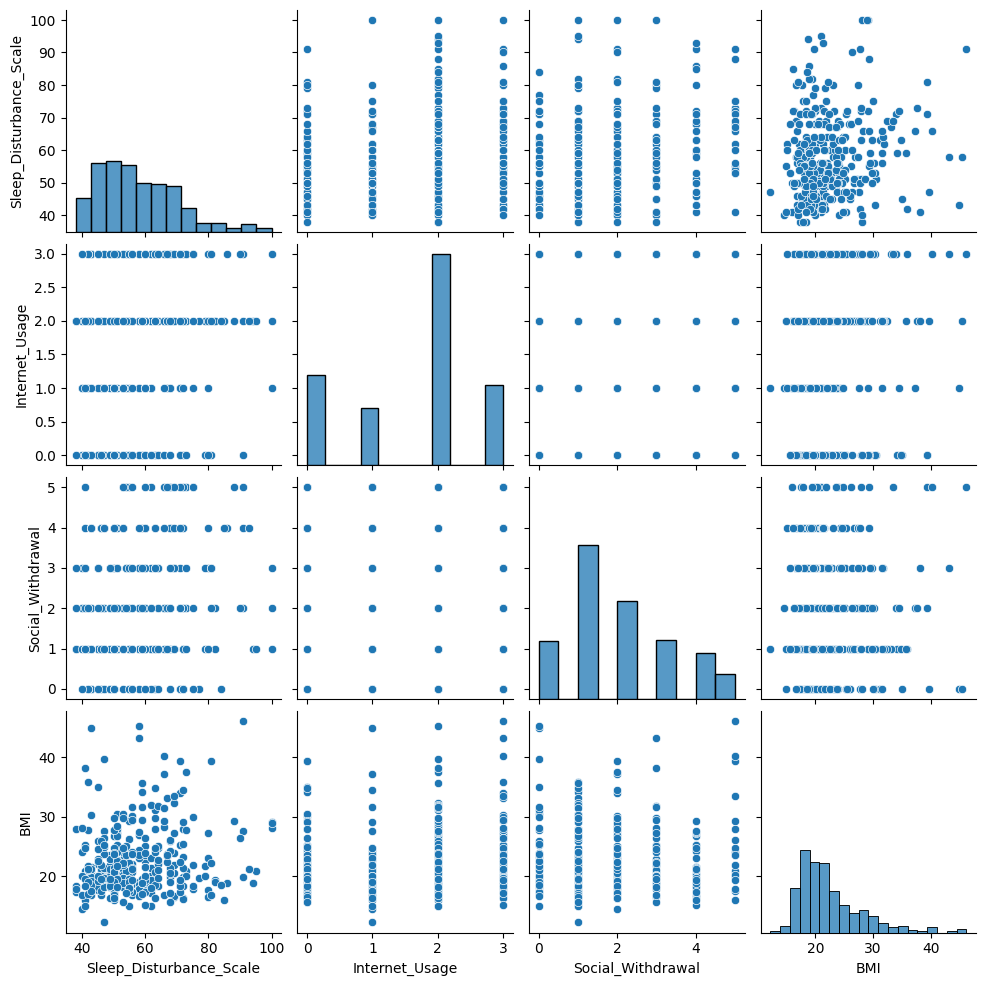

In [15]:
# Plot correlations against all variables
sns.pairplot(data)
plt.show()

###3. Building our Multiple Regression Model


Now that correlations between the variables are visualized and calculated, this next step entails running an *Ordinary Least Squares (OLS) Regression*. According to Simon Fraser University, this procedure obtains the best estimates for the population parameters. The results below show the individual linear regressions for each of the independent variables against the dependent variable.

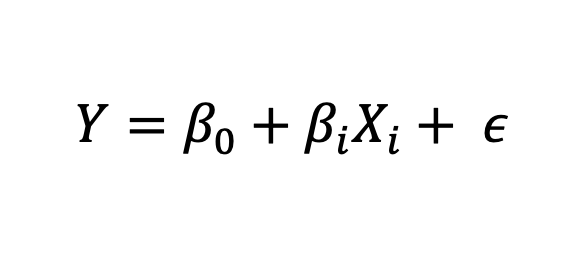

In [16]:
# Fit models with the corresponding independent variables
y = data[['Sleep_Disturbance_Scale']]

x1 = data[['Social_Withdrawal']]
x1 = sm.add_constant(x1)
reg1 = sm.OLS(y, x1).fit()
print(reg1.summary())

x2 = data[['Internet_Usage']]
x2 = sm.add_constant(x2)
reg2 = sm.OLS(y, x2).fit()
print(reg2.summary())

x3 = data[['BMI']]
x3 = sm.add_constant(x3)
reg3 = sm.OLS(y, x3).fit()
print(reg3.summary())

                               OLS Regression Results                              
Dep. Variable:     Sleep_Disturbance_Scale   R-squared:                       0.047
Model:                                 OLS   Adj. R-squared:                  0.044
Method:                      Least Squares   F-statistic:                     16.43
Date:                     Mon, 16 Dec 2024   Prob (F-statistic):           6.28e-05
Time:                             02:45:27   Log-Likelihood:                -1315.1
No. Observations:                      335   AIC:                             2634.
Df Residuals:                          333   BIC:                             2642.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

This subsequent step builds the multiple regression model, and shows the corresponding OLS Regression Results.

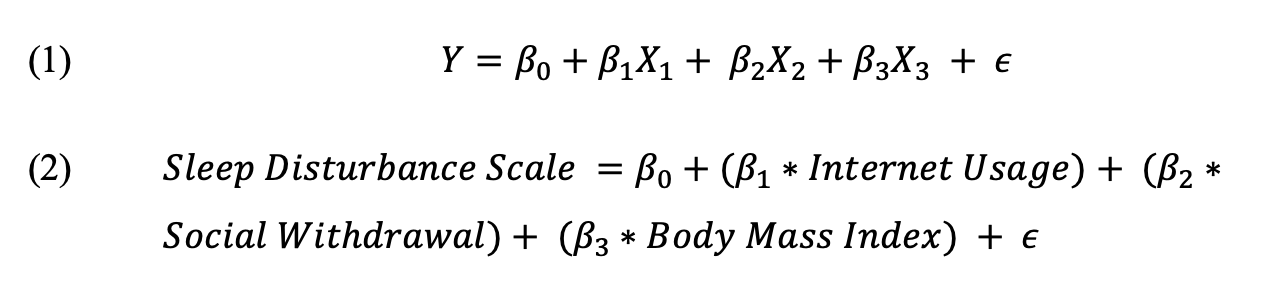



In [18]:
 # Fit the multiple linear regression model (y = b1x1 + b2x2 + b3x3 + e)
x4 = data[['Social_Withdrawal', 'Internet_Usage', 'BMI']]
x4 = sm.add_constant(x4)
fit = sm.OLS(y, x4).fit()
print(fit.summary())

                               OLS Regression Results                              
Dep. Variable:     Sleep_Disturbance_Scale   R-squared:                       0.076
Model:                                 OLS   Adj. R-squared:                  0.067
Method:                      Least Squares   F-statistic:                     9.032
Date:                     Mon, 16 Dec 2024   Prob (F-statistic):           9.16e-06
Time:                             02:46:28   Log-Likelihood:                -1310.0
No. Observations:                      335   AIC:                             2628.
Df Residuals:                          331   BIC:                             2643.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

##4. Testing and Addressing Model Issues

####Underlying Assumptions - Homoskedasticity

Now that the multiple regression model is built, it's important to consider heteroskedasticity. Based from the Corporate Finance Institute, heteroscedasticity refers to "a situation where the variance of residuals is unequal over a range of measured values."

The code below uses a StatsModel package called het_breushpagan, to perform the Breusch-Pagan Test. Derived from the Lagrange multiplier test principle, this procedure investigates for such regression dependency in linear forms.

Interpreting the results, a p-value greater than 0.05 indicates that we fail to reject the null hypothesis and that residuals have a constant variance (homoscedasticity), and more importantly, that heteroscedasticity is not present.

In [19]:
# Conduct the Breush-Pagan Test from the initial fitted regression model
residuals = fit.resid
exog = fit.model.exog

#Get the test result
test_result = diag.het_breuschpagan(residuals, exog)
names = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
results = dict(zip(names, test_result))
print('Breush-Pagan Test Results:')
results

Breush-Pagan Test Results:


{'LM Statistic': 2.4563347880432778,
 'LM p-value': 0.48323407314842826,
 'F-Statistic': 0.8149775000967269,
 'F p-value': 0.48630202965807645}

Similarly, the White Test is used to determine whether the variance of errors in a regression model is constant, or homoscedastic.

The output below shows that the test-statistic p-value and f-test p-value are above a level of siginificance (0.05), meaning that the model isn't heteroscedastic (Bobbitt, 2021).

In [20]:
#Perform White's test
white_test = het_white(fit.resid,  fit.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#Get the test result
print('White Test Results:')
print(dict(zip(labels, white_test)))
{'Test Statistic': 7.076620330416624, 'Test Statistic p-value': 0.21500404394263936,
 'F-Statistic': 1.4764621093131864, 'F-Test p-value': 0.23147065943879694}

White Test Results:
{'Test Statistic': 2.868849005308816, 'Test Statistic p-value': 0.9692682573382538, 'F-Statistic': 0.3119169186071393, 'F-Test p-value': 0.9708238725694734}


{'Test Statistic': 7.076620330416624,
 'Test Statistic p-value': 0.21500404394263936,
 'F-Statistic': 1.4764621093131864,
 'F-Test p-value': 0.23147065943879694}

#### Multicollinearity

Multicollinearity is a common issue when developing a regression since it points to the dependency and correlation of independent variables, which make it challenging to fully understand the relationship between the explanatory and response variables.

To ensure that this phenomenon doesn't occur in this model, the Variance Inflation Factor (VIF), quantifies these dependencies. A high VIF number, typically above a 2 possibly signifify multicollinearity, which is not shown below.

In [21]:
# Run a Variance Inflaction Factor (VIF) Analysis
x_vif = data[['Internet_Usage', 'Social_Withdrawal', 'BMI']]
x_vif = add_constant(x_vif)
vif = pd.DataFrame()
vif['Variable'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]
print(vif)

            Variable        VIF
0              const  19.709773
1     Internet_Usage   1.018206
2  Social_Withdrawal   1.009426
3                BMI   1.011871


##5. Additional Visualizations


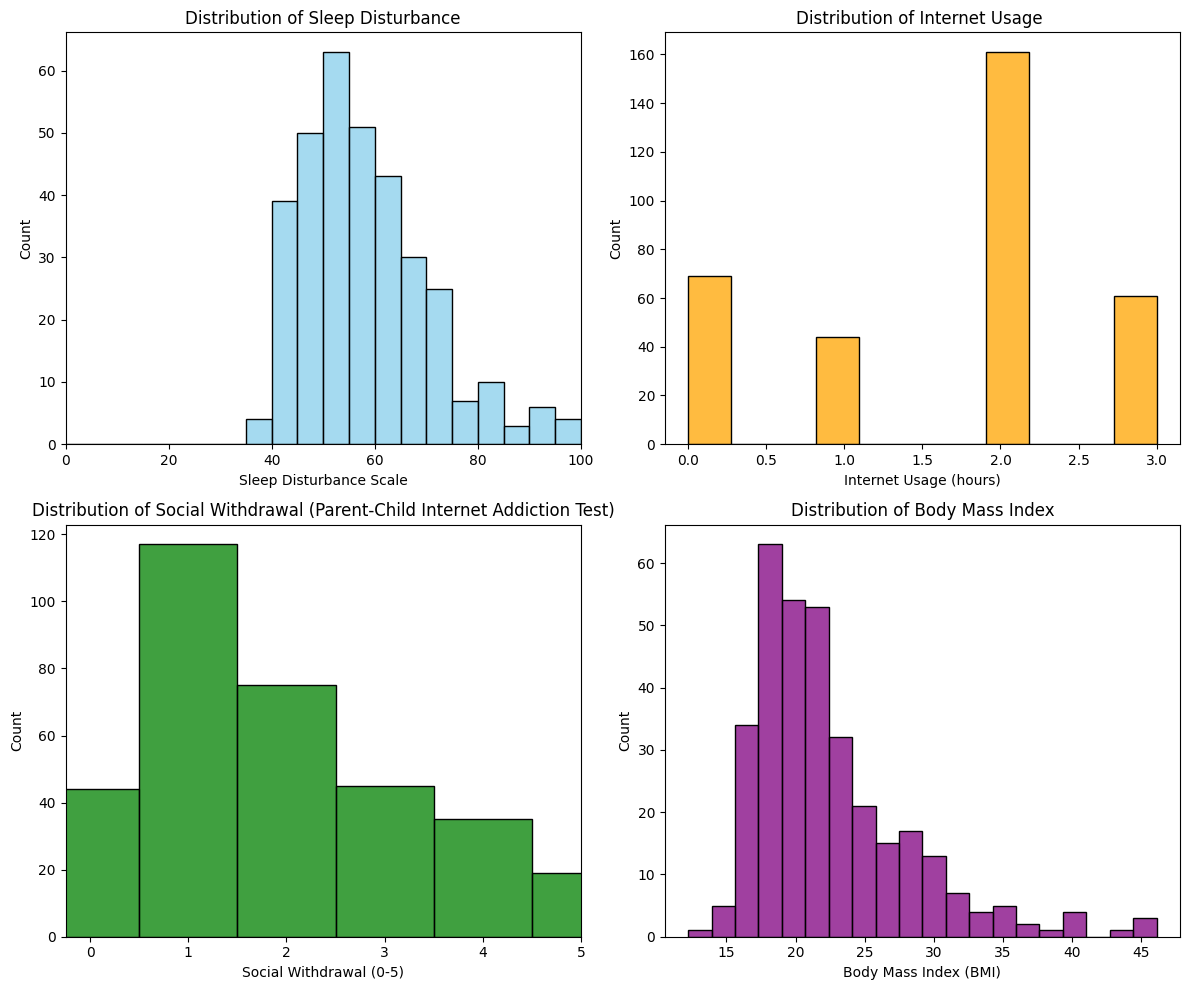

In [53]:
# Plot a panel of histograms for all variables to visualize distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(
    data=data,
    x='Sleep_Disturbance_Scale',
    binrange=(0, 100),
    bins=20,
    color='skyblue',
    ax=axes[0, 0]
      )
axes[0, 0].set_xlim(0, 100)
axes[0, 0].set_xlabel('Sleep Disturbance Scale')
axes[0, 0].set_label('Frequency')
axes[0, 0].set_title("Distribution of Sleep Disturbance")

sns.histplot(
    data=data,
    x='Internet_Usage',
    color='orange',
    ax=axes[0, 1]
      )
axes[0, 1].set_xlabel('Internet Usage (hours)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title("Distribution of Internet Usage ")

sns.histplot(
    data=data,
    x='Social_Withdrawal',
    bins=[-0.75, 0.75, 1.75, 2.75, 3.75, 4.75, 5.75,6.75],
    color='green',
    ax=axes[1, 0]
      )
axes[1, 0].set_xlim(0, 5)
ticks = [0.25, 1.25, 2.25, 3.25, 4.25, 5.25]
axes[1, 0].set_xticks(ticks)
axes[1, 0].set_xticklabels([0, 1, 2, 3, 4, 5])
axes[1, 0].set_xlabel('Social Withdrawal (0-5)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title("Distribution of Social Withdrawal (Parent-Child Internet Addiction Test)")

sns.histplot(
    data=data,
    x='BMI',
    color='purple',
    ax=axes[1, 1]
      )
axes[1, 1].set_xlabel('Body Mass Index (BMI)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title("Distribution of Body Mass Index")

# See the results
plt.tight_layout()
plt.show()

###Sources:

Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.

Bobbitt, Z. (2021, November 29). How to Perform White’s Test in Python (Step-by-Step). Statology. https://www.statology.org/white-test-in-python/

Bobbitt, Z. (2022, February 26). How to Perform a Breusch-Pagan Test in Python. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/

GeeksforGeeks. (2020, August 14). Detecting Multicollinearity with VIF - Python. GeeksforGeeks. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Library Carpentry. (2024, December 10). Libraries & Pandas. Github.io. https://broadinstitute.github.io/2024-09-27-python-intro-lesson/libraries.html

Waskom, M. (2024). Visualizing distributions of data — seaborn 0.13.2 documentation. Pydata.org. https://seaborn.pydata.org/tutorial/distributions.html#tutorial-hist

